In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets/Project-01-Data-Set/train.csv')

##Data Cleaning

In [4]:
# Cleaning mileage col
df['Mileage'] = df['Mileage'].str.replace(" km" , "")
df['Mileage'] = df['Mileage'].astype(int)


# Cleaning Door col
df['Doors'] = df['Doors'].str.replace("04-May" , "4")
df['Doors'] = df['Doors'].str.replace("02-Mar" , "2")
df['Doors'] = df['Doors'].str.replace(">5" , "6")
df['Doors'] = df['Doors'].astype(int)



#cleaning Levy col
df['Levy'] = df['Levy'].str.replace('-' , '0')
df['Levy'] = df['Levy'].astype(int)



#cleaning Engine-Volume col
df['Engine volume'] = df['Engine volume'].apply(lambda x: x[:3] if (' Turbo' in x) else x[:3])
df['Engine volume'] = df['Engine volume'].astype(float)

## Standardizing columns

In [5]:
df['Category'].str.lower()
df['Gear box type'].str.lower()
df['Color'].str.lower()
df['Fuel type'].str.lower()


,Fuel type
0,hybrid
1,petrol
2,petrol
3,hybrid
4,petrol
...,...
19232,cng
19233,petrol
19234,diesel
19235,diesel


##  Removing Duplicated

In [6]:
df = df[df.duplicated() == False]
df.duplicated().unique()


array([False])

In [7]:
df.isnull().sum()


,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [8]:
df['Price'].sort_values()


,Price
16992,1
7815,1
14642,3
15347,3
753,3
...,...
14839,297930
5008,308906
1225,627220
8541,872946


#Ploting

In [9]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,2,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,4,Left wheel,Black,4


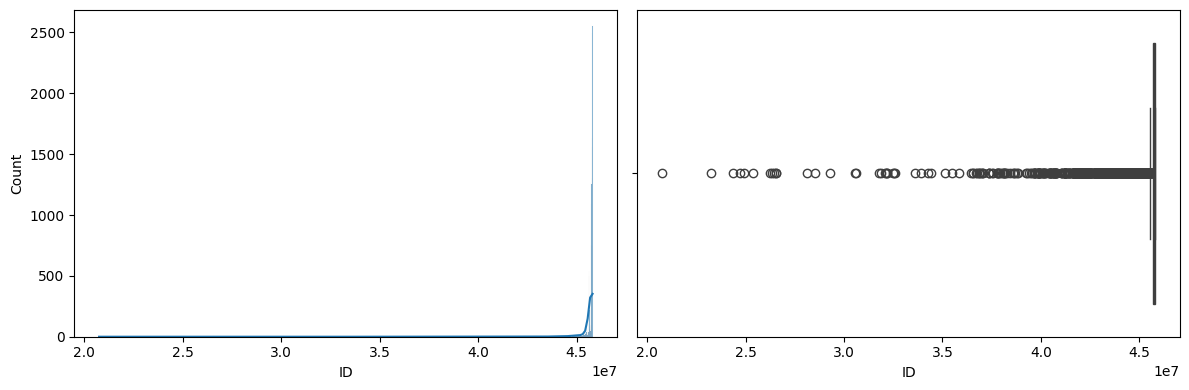

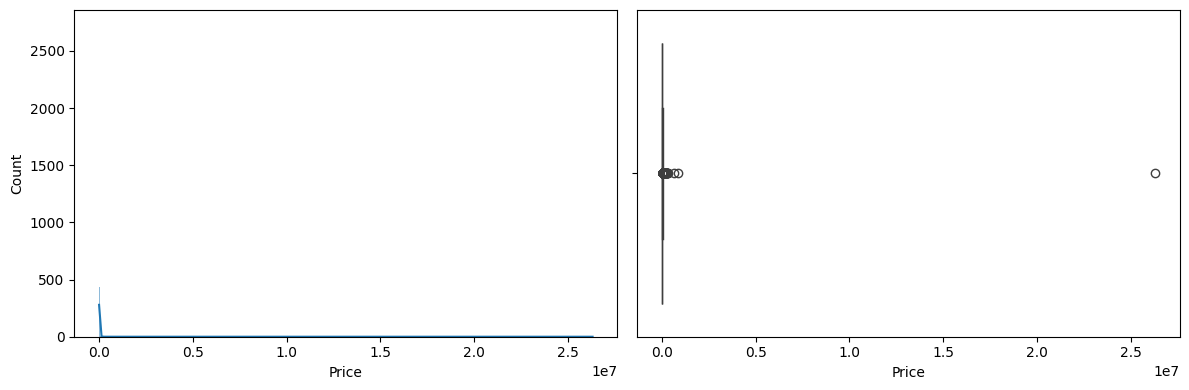

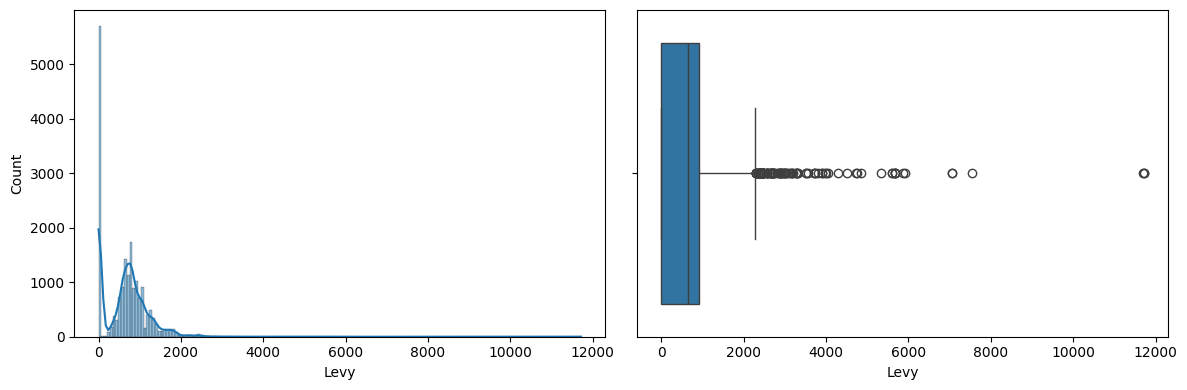

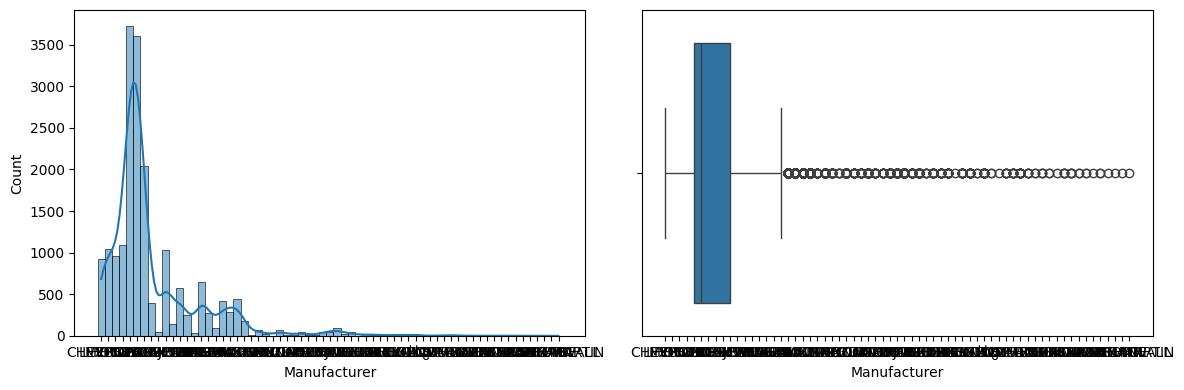

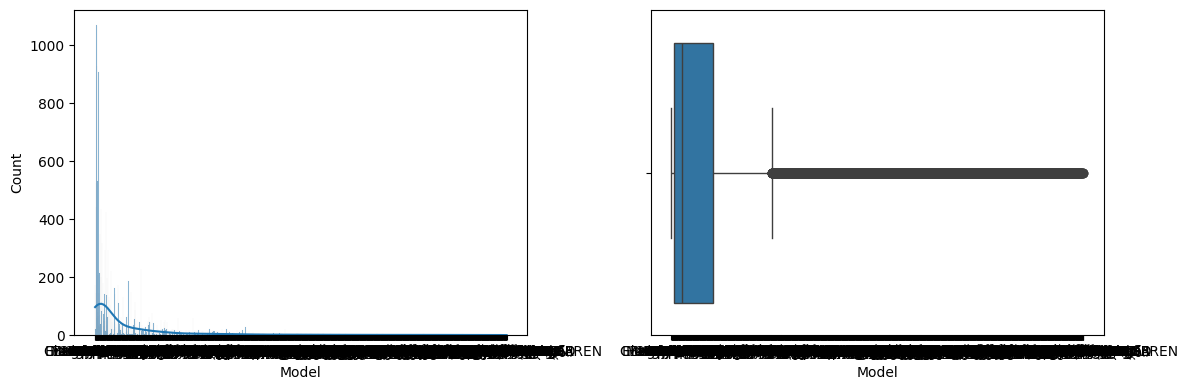

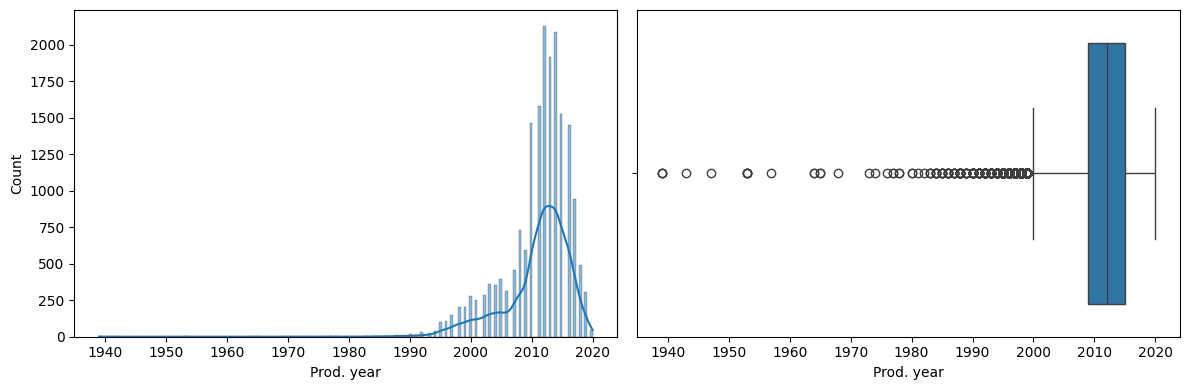

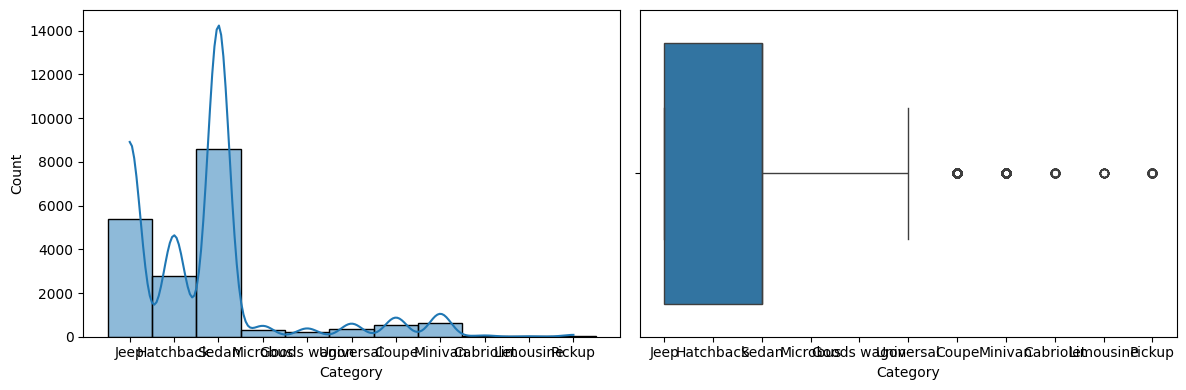

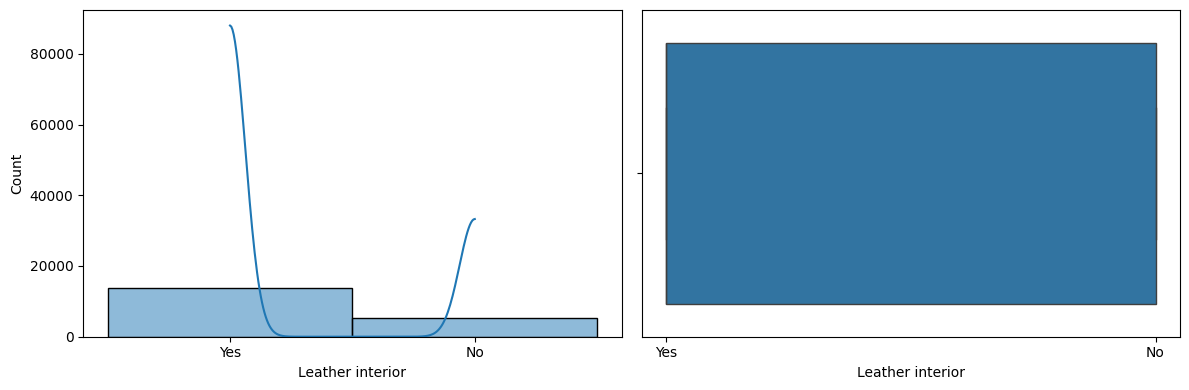

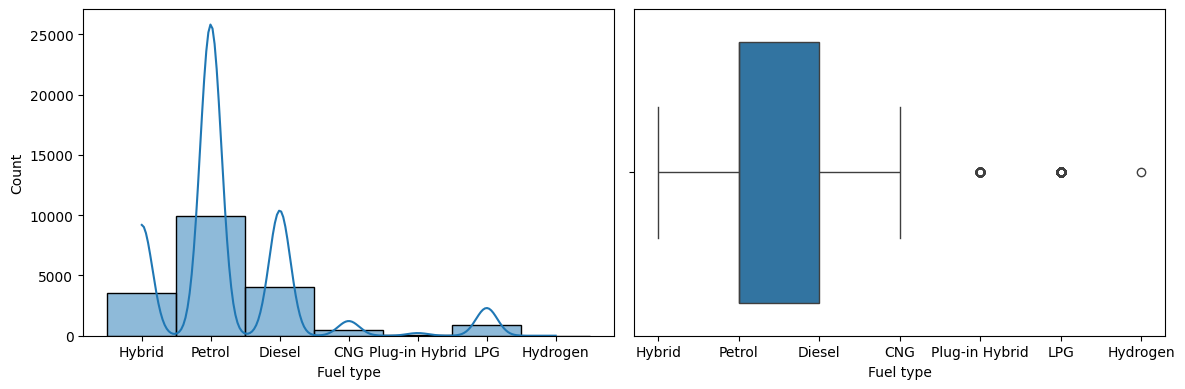

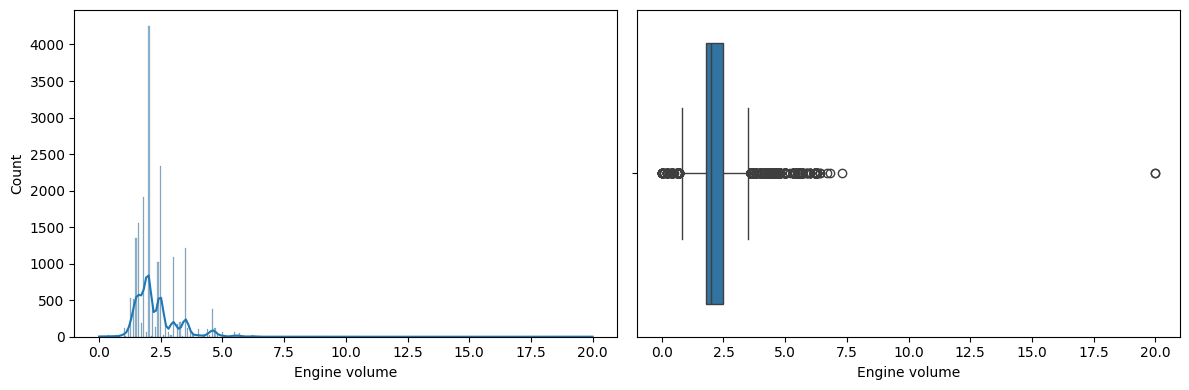

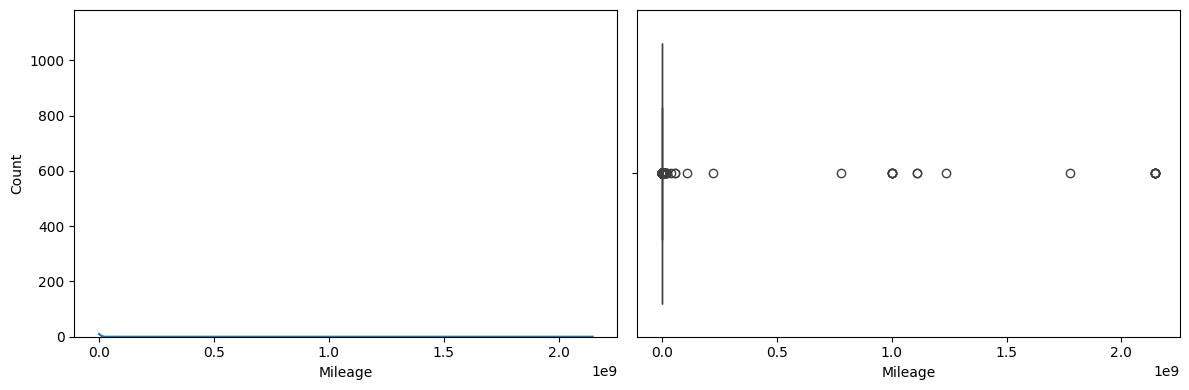

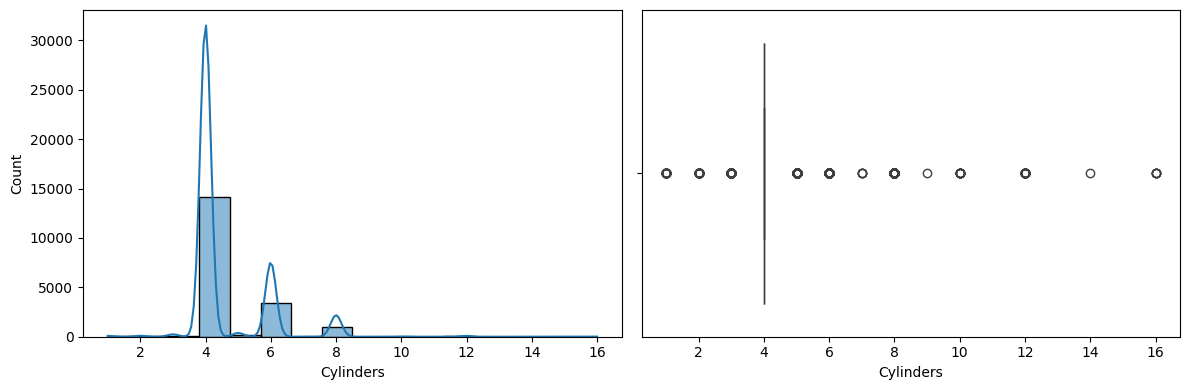

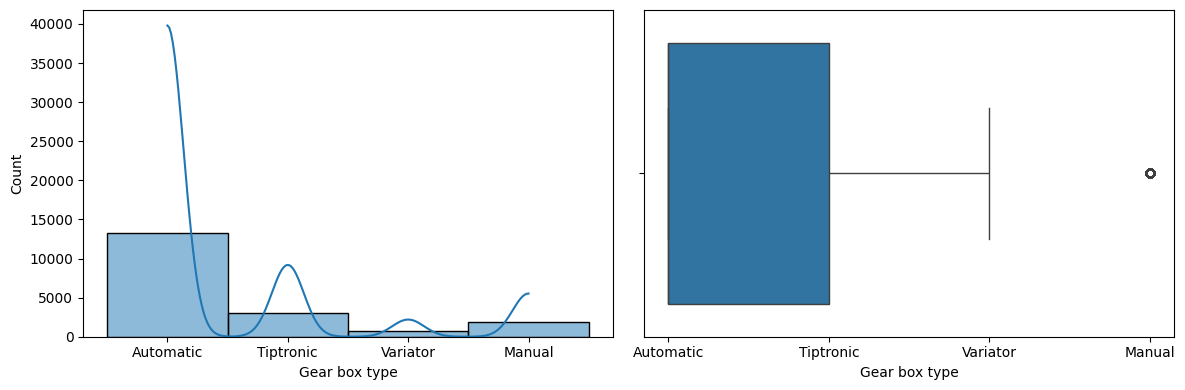

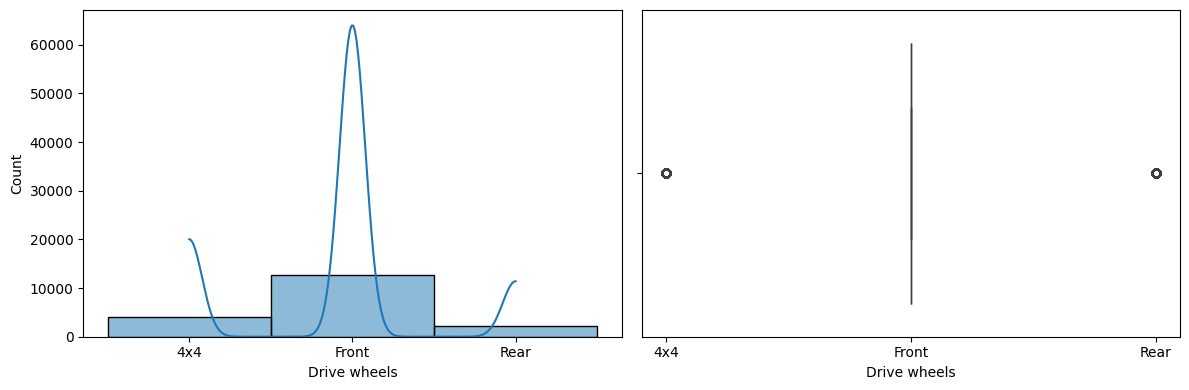

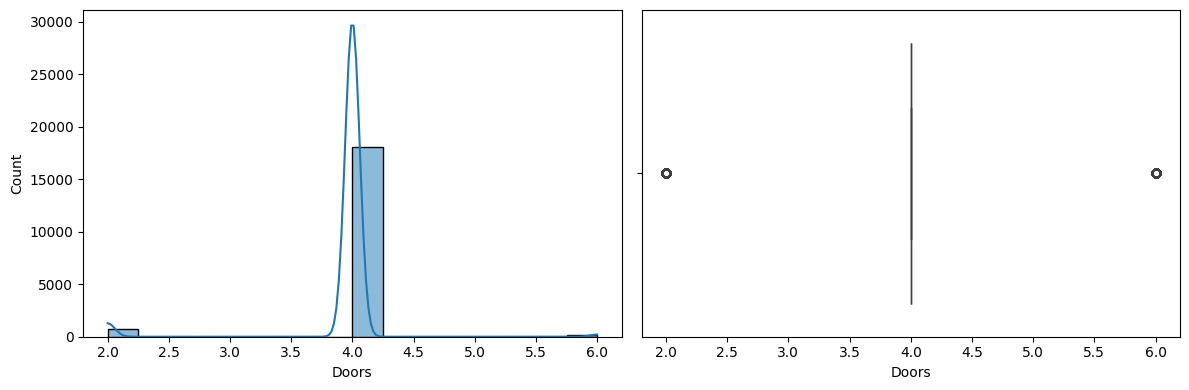

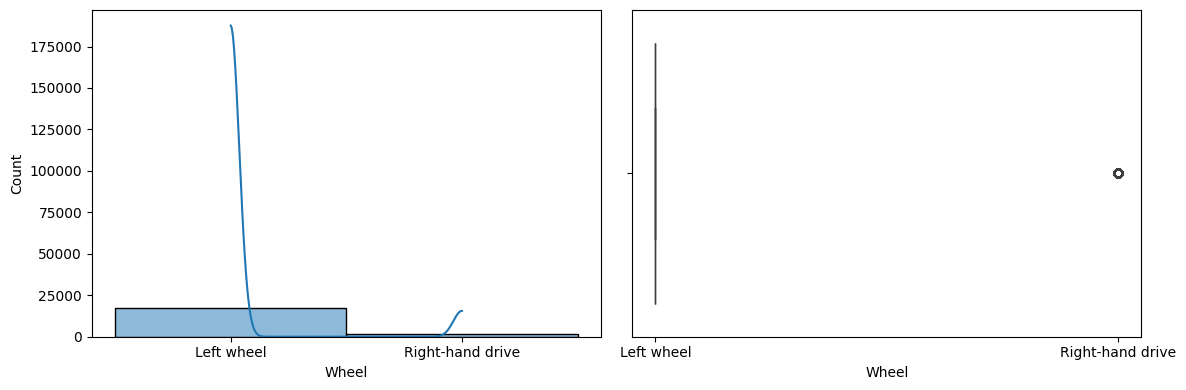

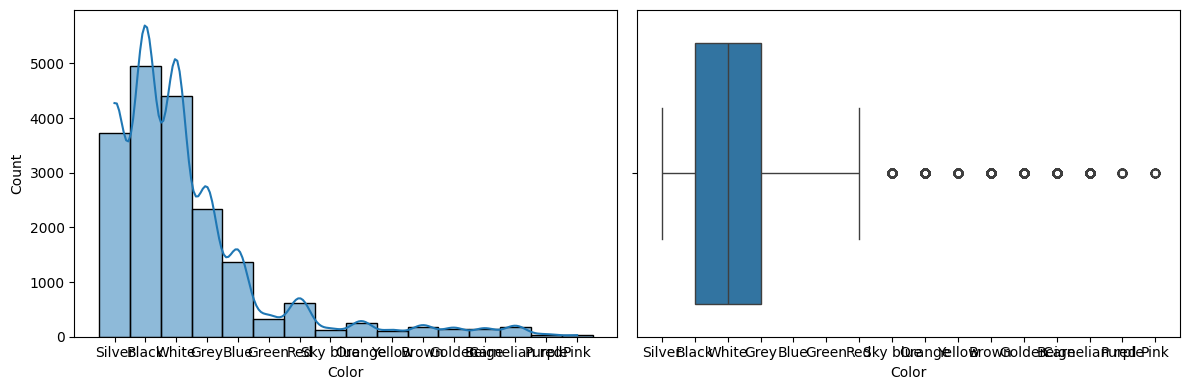

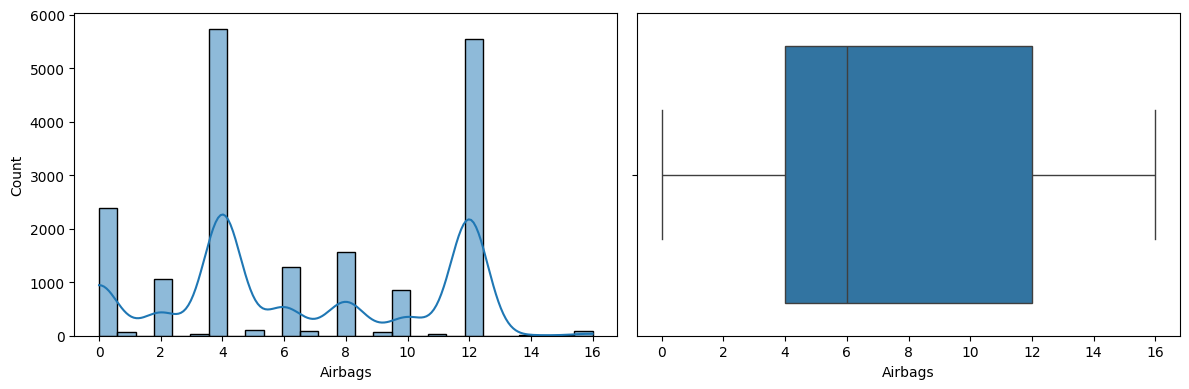

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# numeric_vals = ['Levy', 'Prod. year', 'Mileage', 'Engine volume', 'Cylinders', 'Price']
numeric_vals = df.columns.tolist()
for col in numeric_vals:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.tight_layout()
    plt.show()

In [12]:
#removing outliner data

price_out = (df['Price'] > 0) & (df['Price'] <= 3000000)
df = df[price_out]

levy_out = (df['Levy'] > 0) & (df['Levy'] <= 6500)
df = df[levy_out]

prod_year_out = (df['Prod. year'] > 1975)
df = df[prod_year_out]

engine_volume_out = (df['Engine volume'] > 0) & (df['Engine volume'] <= 7.3)
df = df[engine_volume_out]

mileage_out = (df['Mileage'] > 0) & (df['Mileage'] <= 200000000)
df = df[mileage_out]

In [13]:
df.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [14]:
df.shape

(12852, 18)

#data Visulization

In [16]:
import matplotlib.pyplot as plt
import numpy as np

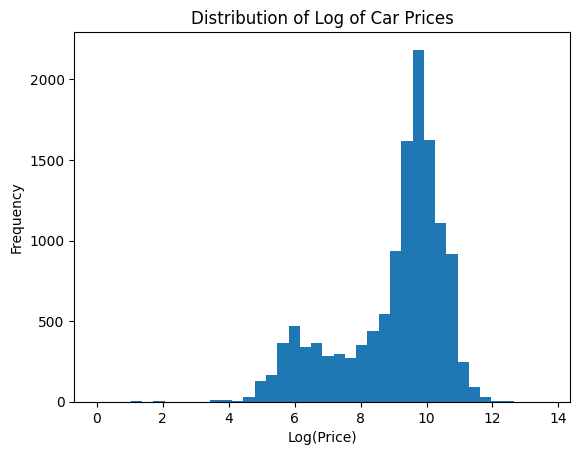

In [17]:
#price distribution


plt.hist(np.log(df["Price"]) , bins=40 )
plt.title("Distribution of Log of Car Prices")
plt.xlabel("Log(Price)")
plt.ylabel("Frequency")
plt.show()

#Model Training

##Seperating features and labels

In [ ]:
x = df.iloc[:, 2:]
y = df.iloc[:, 1]

In [ ]:
x

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2
3,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0
4,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,4,Left wheel,Grey,12
19232,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,2,Left wheel,Silver,5
19233,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8
19234,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4


##aDDING ADDITIONAL COLUMNS

In [23]:
# Calculate car age
from datetime import datetime

current_year = datetime.now().year
df['car_age'] = current_year - df['Prod. year']
# Age categories
df['age_category'] = pd.cut(df['car_age'],
                           bins=[0, 3, 7, 10, 15, 100],
                           labels=['New', 'Young', 'Mid-aged', 'Old', 'Very Old'])
# df.drop('car_age', axis=1, inplace=True)

In [24]:
# Mileage per year (important for car valuation)
df['miles_per_year'] = df['Mileage'] / (df['car_age'] + 1)  # +1 to avoid division by zero

# Mileage categories
df['mileage_category'] = pd.cut(df['Mileage'],
                               bins=[0, 30000, 80000, 150000, 250000, 1000000],
                               labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Mileage to age ratio
df['mileage_age_ratio'] = df['Mileage'] / (df['car_age'] + 1)

In [26]:
# Power-to-weight ratio (estimate)
df['power_to_volume'] = df['Cylinders'] / df['Engine volume']

# Engine size categories
df['engine_size_category'] = pd.cut(df['Engine volume'],
                                   bins=[0, 1.6, 2.5, 3.5, 10],
                                   labels=['Small', 'Medium', 'Large', 'Very Large'])

# Fuel efficiency estimate
df['fuel_efficiency'] = df['Engine volume'] * 10  # Simple estimate

In [29]:
# Brand + Model combination
# df['brand_model'] = df['Manufacturer'] + '_' + df['Model']

# Luxury interior indicator
df['luxury_interior'] = ((df['Leather interior'] == 'Yes') &
                         (df['Airbags'] > 4)).astype(int)

# 4x4 premium indicator
df['premium_4x4'] = ((df['Drive wheels'] == '4x4')).astype(int)

In [32]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,age_category,car_age,miles_per_year,mileage_category,mileage_age_ratio,power_to_volume,engine_size_category,fuel_efficiency,luxury_interior,premium_4x4
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,...,Old,15,11625.312500,High,11625.312500,1.714286,Large,35.0,1,1
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,...,Old,14,12800.000000,High,12800.000000,2.000000,Large,30.0,0,1
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,...,Old,14,11264.400000,High,11264.400000,1.600000,Medium,25.0,0,1
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,...,Old,11,7658.416667,Medium,7658.416667,3.076923,Small,13.0,0,0
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,...,Mid-aged,9,16093.100000,High,16093.100000,2.000000,Medium,20.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,...,Old,12,8292.307692,Medium,8292.307692,1.714286,Large,35.0,1,0
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,...,Old,14,10773.333333,High,10773.333333,1.666667,Medium,24.0,1,0
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,...,Old,15,7272.812500,Medium,7272.812500,2.000000,Medium,20.0,0,0
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,...,Very Old,18,2697.789474,Low,2697.789474,2.000000,Medium,20.0,0,0


In [34]:
#lables and features splitting

x = df.iloc[:, 2:]
y = df.iloc[:, 1]

#Scaling and Encoding

In [35]:
#Lable Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

x['Fuel type'] = le.fit_transform(x['Fuel type'])
x['Leather interior'] = le.fit_transform(x['Leather interior'])
x['Category'] = le.fit_transform(x['Category'])
x['Gear box type'] = le.fit_transform(x['Gear box type'])
x['Color'] = le.fit_transform(x['Color'])
x['Manufacturer'] = le.fit_transform(x['Manufacturer'])
x['Wheel']= le.fit_transform(x['Wheel'])
x['Model'] = le.fit_transform(x['Model'])
x['Drive wheels'] = le.fit_transform(x['Drive wheels'])
x['Doors'] = le.fit_transform(x['Doors'])
x['age_category'] = le.fit_transform(x['age_category'])
x['mileage_category'] = le.fit_transform(x['mileage_category'])
x['engine_size_category'] = le.fit_transform(x['engine_size_category'])


In [37]:
x


,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,...,age_category,car_age,miles_per_year,mileage_category,mileage_age_ratio,power_to_volume,engine_size_category,fuel_efficiency,luxury_interior,premium_4x4
0,1399,26,619,2010,4,1,2,3.5,186005,6.0,...,1,15,11625.312500,0,11625.312500,1.714286,0,35.0,1,1
1,1018,6,307,2011,4,0,4,3.0,192000,6.0,...,1,14,12800.000000,0,12800.000000,2.000000,0,30.0,0,1
3,862,14,310,2011,4,1,2,2.5,168966,4.0,...,1,14,11264.400000,0,11264.400000,1.600000,1,25.0,0,1
4,446,17,325,2014,3,1,4,1.3,91901,4.0,...,1,11,7658.416667,2,7658.416667,3.076923,2,13.0,0,0
5,891,19,641,2016,4,1,1,2.0,160931,4.0,...,0,9,16093.100000,0,16093.100000,2.000000,1,20.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,1055,30,270,2013,8,1,1,3.5,107800,6.0,...,1,12,8292.307692,2,8292.307692,1.714286,0,35.0,1,0
19233,831,19,658,2011,8,1,4,2.4,161600,4.0,...,1,14,10773.333333,0,10773.333333,1.666667,1,24.0,1,0
19234,836,19,714,2010,4,1,1,2.0,116365,4.0,...,1,15,7272.812500,2,7272.812500,2.000000,1,20.0,0,0
19235,1288,6,195,2007,4,1,1,2.0,51258,4.0,...,2,18,2697.789474,1,2697.789474,2.000000,1,20.0,0,0


In [45]:
#Standard Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x['Levy'] = sc.fit_transform(x[['Levy']])
x['Mileage'] = sc.fit_transform(x[['Mileage']])
x['Model'] = sc.fit_transform(x[['Model']])
x['Prod. year'] = sc.fit_transform(x[['Prod. year']])
x['Manufacturer'] = sc.fit_transform(x[['Manufacturer']])
x['Category']= sc.fit_transform(x[['Category']])
x['Fuel type'] = sc.fit_transform(x[['Fuel type']])
x['Engine volume'] = sc.fit_transform(x[['Engine volume']])
x['Cylinders'] = sc.fit_transform(x[['Cylinders']])
x['Gear box type'] = sc.fit_transform(x[['Gear box type']])
x['Drive wheels'] = sc.fit_transform(x[['Drive wheels']])
x['Doors'] = sc.fit_transform(x[['Doors']])
x['Airbags']= sc.fit_transform(x[['Airbags']])
x['Color'] = sc.fit_transform(x[['Color']])
x['Leather interior'] = sc.fit_transform(x[['Leather interior']])
x['Wheel'] = sc.fit_transform(x[['Wheel']])
x['car_age'] = sc.fit_transform(x[['car_age']])
x['miles_per_year'] = sc.fit_transform(x[['miles_per_year']])
x['power_to_volume'] = sc.fit_transform(x[['power_to_volume']])
x['fuel_efficiency'] = sc.fit_transform(x[['fuel_efficiency']])
x['luxury_interior'] = sc.fit_transform(x[['luxury_interior']])
x['premium_4x4'] = sc.fit_transform(x[['premium_4x4']])
x['age_category'] = sc.fit_transform(x[['age_category']])
x['mileage_category'] = sc.fit_transform(x[['mileage_category']])
x['engine_size_category'] = sc.fit_transform(x[['engine_size_category']])
x['mileage_age_ratio'] = sc.fit_transform(x[['mileage_age_ratio']])



In [39]:
y_scaled = sc.fit_transform(y.values.reshape(-1, 1))

In [46]:
x

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,...,age_category,car_age,miles_per_year,mileage_category,mileage_age_ratio,power_to_volume,engine_size_category,fuel_efficiency,luxury_interior,premium_4x4
0,0.222839,0.553191,0.794608,0.642857,0.444444,1.0,0.4,0.472222,0.103330,0.333333,...,0.333333,0.357143,0.096864,0.0,0.096864,0.071202,0.000000,0.472222,1.0,1.0
1,0.156716,0.127660,0.394095,0.678571,0.444444,0.0,0.8,0.402778,0.106660,0.333333,...,0.333333,0.321429,0.106653,0.0,0.106653,0.085714,0.000000,0.402778,0.0,1.0
3,0.129642,0.297872,0.397946,0.678571,0.444444,1.0,0.4,0.333333,0.093863,0.200000,...,0.333333,0.321429,0.093856,0.0,0.093856,0.065397,0.333333,0.333333,0.0,1.0
4,0.057445,0.361702,0.417202,0.785714,0.333333,1.0,0.8,0.166667,0.051049,0.200000,...,0.333333,0.214286,0.063806,0.4,0.063806,0.140415,0.666667,0.166667,0.0,0.0
5,0.134675,0.404255,0.822850,0.857143,0.444444,1.0,0.2,0.263889,0.089400,0.200000,...,0.000000,0.142857,0.134096,0.0,0.134096,0.085714,0.333333,0.263889,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,0.163138,0.638298,0.346598,0.750000,0.888889,1.0,0.2,0.472222,0.059882,0.333333,...,0.333333,0.250000,0.069088,0.4,0.069088,0.071202,0.000000,0.472222,1.0,0.0
19233,0.124262,0.404255,0.844673,0.678571,0.888889,1.0,0.8,0.319444,0.089771,0.200000,...,0.333333,0.321429,0.089764,0.0,0.089764,0.068783,0.333333,0.319444,1.0,0.0
19234,0.125130,0.404255,0.916560,0.642857,0.444444,1.0,0.2,0.263889,0.064640,0.200000,...,0.333333,0.357143,0.060592,0.4,0.060592,0.085714,0.333333,0.263889,0.0,0.0
19235,0.203575,0.127660,0.250321,0.535714,0.444444,1.0,0.2,0.263889,0.028470,0.200000,...,0.666667,0.464286,0.022466,0.2,0.022466,0.085714,0.333333,0.263889,0.0,0.0


In [40]:
y_scaled

array([[0.01526671],
       [0.019039  ],
       [0.00413084],
       ...,
       [0.02990681],
       [0.00610577],
       [0.00053726]])

##Splitting data

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
x_train.shape

(10281, 26)

## Creating ANN

In [49]:
#import required functions and classes
import tensorflow as tf
from tensorflow.keras.models import Sequential    #to implement neutral network as sequence of layers to implement forward and backward propogation
from tensorflow.keras.layers import Dense         #to create nodes of neutal network
from tensorflow.keras.layers import Dropout       #to eliminate useless nodes while model
from tensorflow.keras.layers import LeakyReLU , PReLU , ELU , ReLU   # Activation functions
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [50]:
#Early stoping (so i can stop training model when the val_loss become almost constant which means model is not become efficient anymore)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=1,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [51]:
from tensorflow.keras.layers import LeakyReLU

def create_car_price_model(input_dim):
    model = Sequential([
        # Process all features
        Dense(128, input_shape=(input_dim,)),
        LeakyReLU(alpha=0.01),  # Activation as a separate layer
        BatchNormalization(),
        Dropout(0.3),


        Dense(128),
        LeakyReLU(alpha=0.01),  # Activation as a separate layer
        BatchNormalization(),
        Dropout(0.3),

        # Learn patterns
        Dense(64),
        LeakyReLU(alpha=0.01),  # Consistent activation
        BatchNormalization(),
        Dropout(0.2),
        Dense(64),
        LeakyReLU(alpha=0.01),  # Consistent activation
        BatchNormalization(),
        Dropout(0.2),

        # Final computation
        Dense(32),
        LeakyReLU(alpha=0.01),  # Consistent activation
        BatchNormalization(),
        Dense(18),
        LeakyReLU(alpha=0.01),  # Consistent activation
        BatchNormalization(),

        # Output price
        Dense(1)
    ])
    return model





In [67]:
model = create_car_price_model(x_train.shape[1])
model.compile(optimizer=Adam(0.001), loss='huber', metrics=['mae', 'mse'])
model_history = model.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=100 , callbacks=early_stopping)
# model_history = model.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 17510.1992 - mae: 17510.7012 - mse: 630028288.0000 - val_loss: 17605.2148 - val_mae: 17605.7129 - val_mse: 819717120.0000
Epoch 2/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 17647.9863 - mae: 17648.4902 - mse: 688232384.0000 - val_loss: 17536.6406 - val_mae: 17537.1387 - val_mse: 817177280.0000
Epoch 3/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 17654.3652 - mae: 17654.8672 - mse: 651721664.0000 - val_loss: 17440.9824 - val_mae: 17441.4902 - val_mse: 813816448.0000
Epoch 4/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 17220.6055 - mae: 17221.1055 - mse: 629396160.0000 - val_loss: 17339.1562 - val_mae: 17339.6543 - val_mse: 809796032.0000
Epoch 5/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 17066.8047 - mae: 17067.2969 - mse: 606402816.0000 - val_loss: 17187.7012 - val_mae: 17188.1973 - val_mse: 803350976.0000
Epoch 6/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 17413.1445 - mae: 17413.

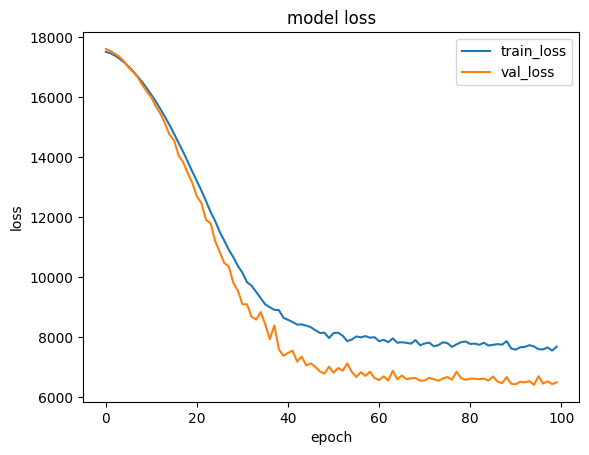

In [68]:
#Loss Graph

plt.plot(model_history.history['loss'] , label='train_loss')
plt.plot(model_history.history['val_loss'] , label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [69]:
#predicting the tese set result

y_pred = model.predict(x_test)

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


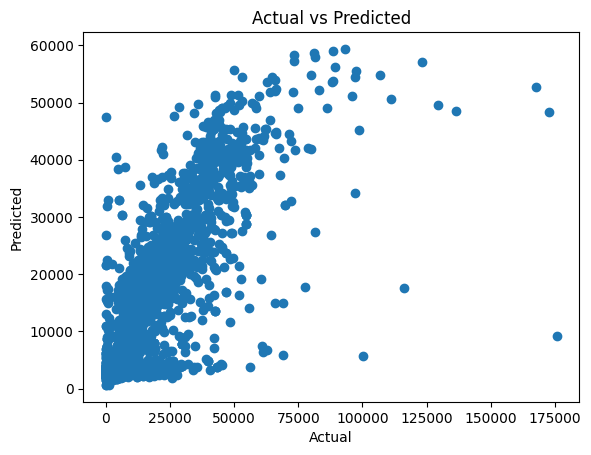

In [70]:
#graph b/w actual and prediction values of test data

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [71]:
#making r2 matrix  and calculate loss

from sklearn.metrics import r2_score

loss = model.evaluate(x_test, y_test)
print("Loss : " ,loss)

r2_score = r2_score(y_test, y_pred)
print("R2 Score : " ,r2_score)

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6232.1792 - mae: 6232.6792 - mse: 123537336.0000
Loss :  [6205.42626953125, 6205.92626953125, 130969080.0]
R2 Score :  0.594804048538208


In [57]:
#Comparing values(Predicted vs Actual)

import pandas as pd

# Flatten y_pred if it's 2D
y_pred_flat = y_pred.ravel()   # or use .flatten()

comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred_flat
})

print(comparison.head(20))

    Actual     Predicted
0     2300   7095.291992
1      941   4730.312988
2    15367  12377.028320
3     8467   6078.336914
4    42337  14403.922852
5    40471  40936.929688
6    18208  14517.089844
7    67483  44024.011719
8    34836  46557.132812
9    30750  32403.128906
10   20385   3840.686768
11   21639  19080.310547
12   59865  54659.398438
13   12544  14710.399414
14   13604  18131.058594
15    8075  15747.773438
16   31675  62034.843750
17   22332  16966.136719
18     470   2844.648438
19     470  15414.803711


In [ ]:
# XGBoost Model

In [59]:
# XGBoost implementation
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train XGBoost
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

model.fit(X_train, Y_train,
          eval_set=[(X_test, Y_test)],
          verbose=False)

# Predict and evaluate
predictions = model.predict(X_test)

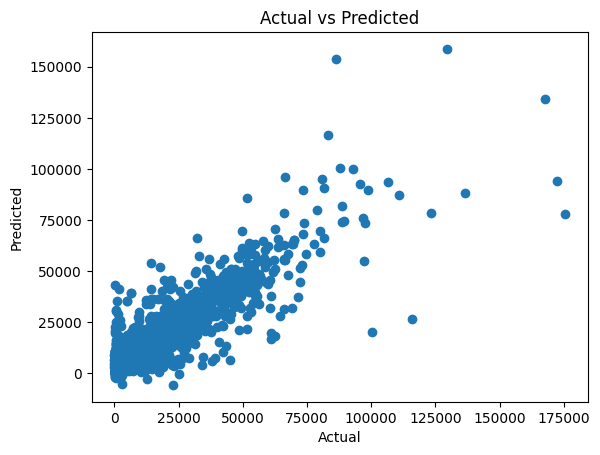

In [60]:
# R2_score = r2_score(Y_test, predictions)
# print("R2 Score : " ,R2_score)


plt.scatter(Y_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, predictions)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 4373.3584
MSE: 65119268.0000
RMSE: 8069.6510
R² Score: 0.7985


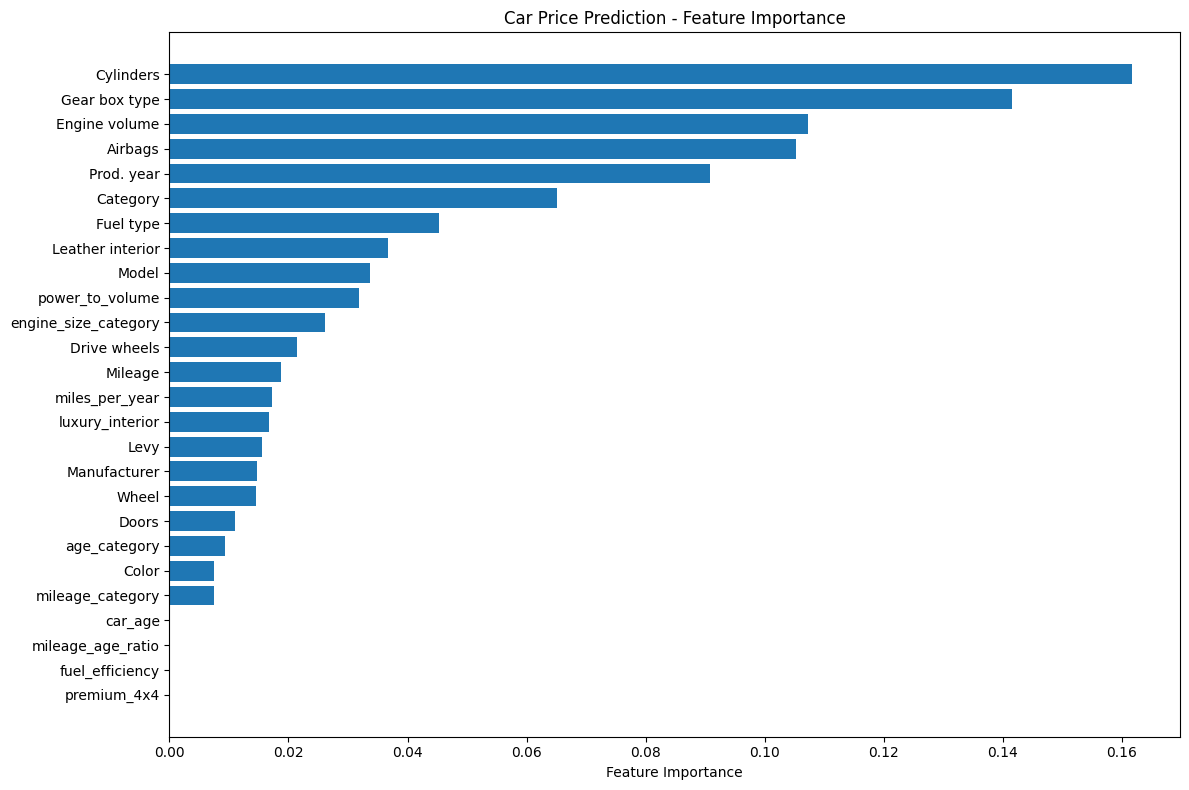

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from your trained model
feature_importance = model.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importance)
features = x.columns  # Make sure X is your DataFrame with column names

# Plot
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Car Price Prediction - Feature Importance')
plt.tight_layout()
plt.show()

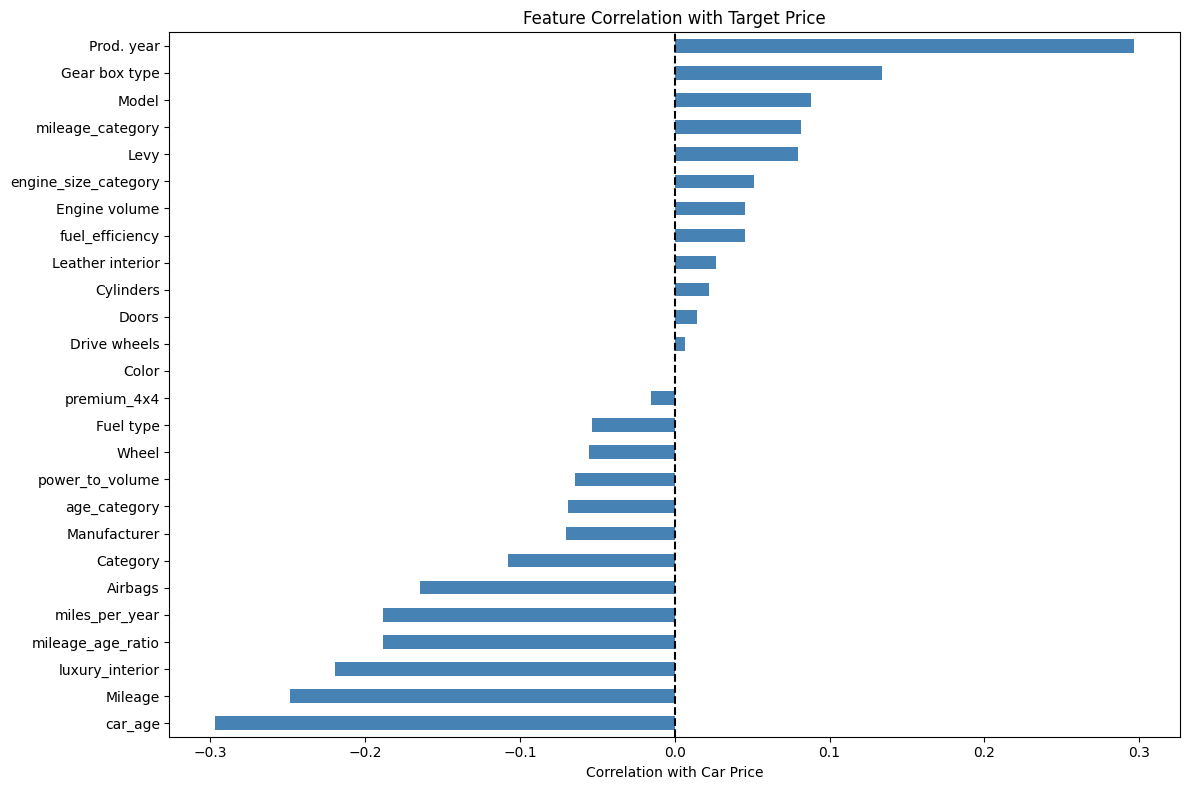

In [63]:
import seaborn as sns

# Calculate correlation with target price
correlation_with_target = x.corrwith(y)

# Plot
plt.figure(figsize=(12, 8))
correlation_with_target.sort_values().plot(kind='barh', color='steelblue')
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel('Correlation with Car Price')
plt.title('Feature Correlation with Target Price')
plt.tight_layout()
plt.show()

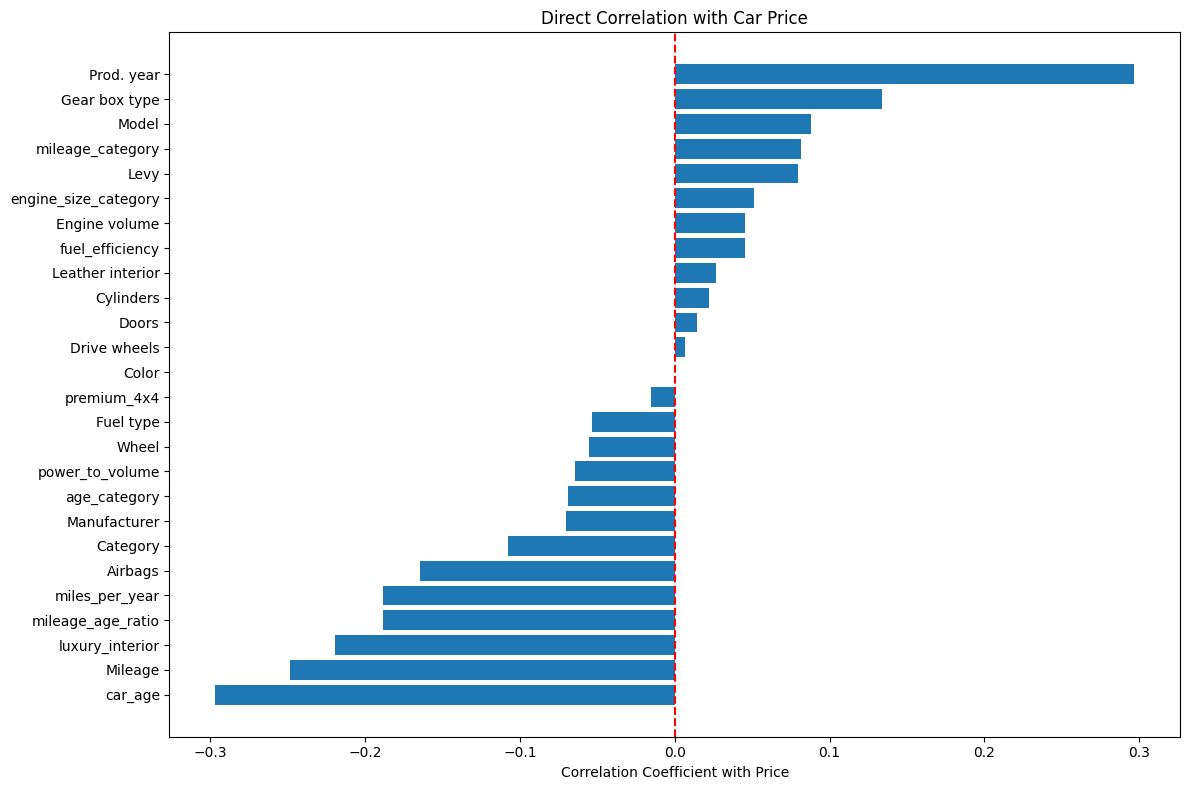

In [64]:
import pandas as pd

# Calculate correlation of each feature with price
correlation_with_price = x.corrwith(y)  # y is your price column

# Sort and plot
correlation_sorted = correlation_with_price.sort_values()

plt.figure(figsize=(12, 8))
plt.barh(range(len(correlation_sorted)), correlation_sorted.values, align='center')
plt.yticks(range(len(correlation_sorted)), correlation_sorted.index)
plt.xlabel('Correlation Coefficient with Price')
plt.title('Direct Correlation with Car Price')
plt.axvline(x=0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

In [65]:
# Drop features with very weak correlation
# columns_to_drop = ['Drive wheels', 'Airbags', 'Color', 'Fuel type', 'Wheel', 'Doors']
columns_to_drop = ['Drive wheels', 'Airbags', 'Color', 'Fuel type']
X_reduced = x.drop(columns=columns_to_drop)

#SK-Learn Models

In [75]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

# Try these in order:
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Ridge Regression': Ridge(alpha=1.0)
}

for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    mae = mean_absolute_error(y_test, preds)
    print(f"{name} MAE: {mae:.2f}")
    try:
      print("r2_score", r2_score(y_test, preds))
      print(model.evaluate(x_test, y_test))
    except:
      continue

Random Forest MAE: 4102.42
Gradient Boosting MAE: 6791.77
Ridge Regression MAE: 10146.32
